# Imports

In [86]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# EDA

### Univariate statistics

In [87]:
data = pd.read_csv('winequality-red.csv')

In [88]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [89]:
data.shape

(1599, 12)

In [90]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


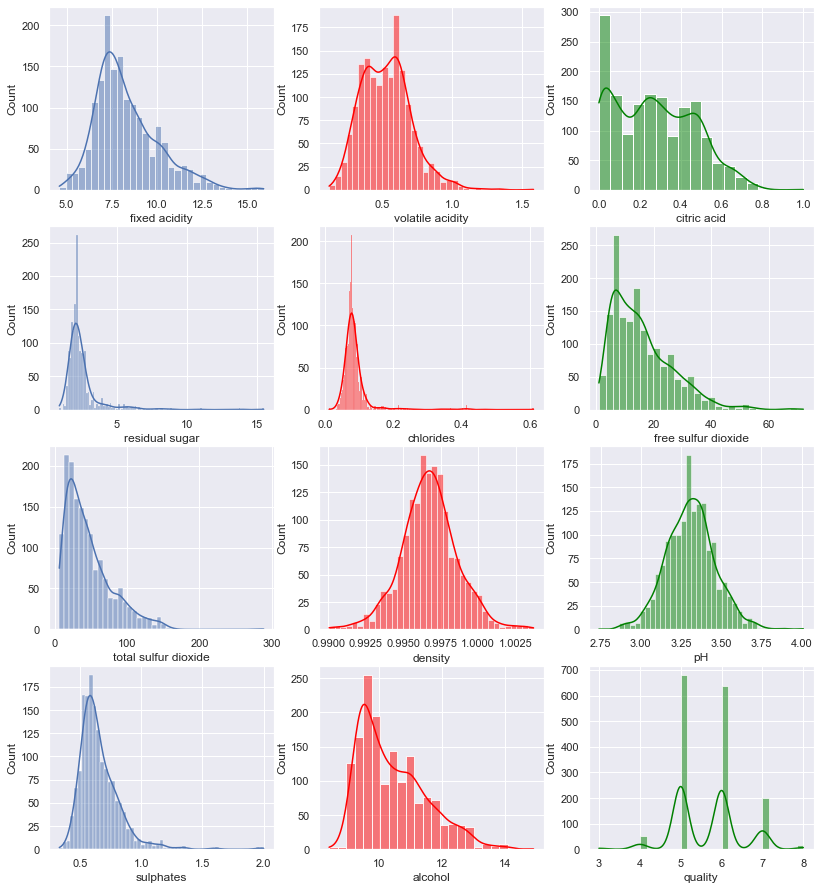

In [92]:
def plot_all_features(data: pd.DataFrame):
    fig, axs = plt.subplots(ncols=3, nrows=4)
    
    plot_col = plot_row = 0
    
    for col in data.columns:
        if plot_col % 3 == 1:
            sns.histplot(data[col], kde=True, ax=axs[plot_row][plot_col], color='red')
        elif plot_col % 3 == 2:
            sns.histplot(data[col], kde=True, ax=axs[plot_row][plot_col], color='green')
            plot_row += 1
        else:
            sns.histplot(data[col], kde=True, ax=axs[plot_row][plot_col])
            
        plot_col += 1
        
        if plot_col > 2:
            plot_col = 0 
        
    plt.show()

sns.set(rc={'figure.figsize':(13.7,15.5)})
plot_all_features(data)

In [93]:
scaled_data = data.copy()
features = list(scaled_data.columns)[:-1]

for feature in features:
    scaler = MinMaxScaler()
    scaled_data[feature] = scaler.fit_transform(np.array(scaled_data[feature]).reshape(-1, 1))

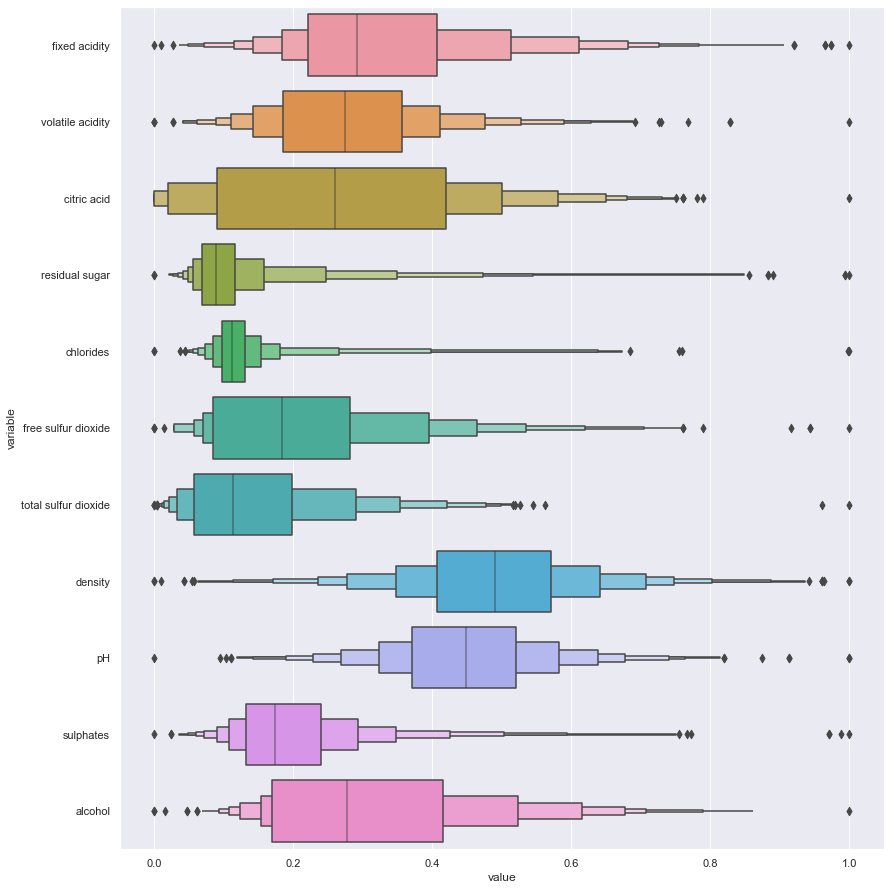

In [94]:
sns.set(rc={'figure.figsize':(13.7,15.5)})
sns.boxenplot(x='value', y='variable', 
            data=pd.melt(scaled_data.drop('quality', axis=1)), orient='h');

*Summary:*
- pH and density are seem to be distributed normally
- chlorides and residual sugars are also distributed normally, if ignoring outliers
- all most every other feature distribution seem to be positively/rigth skewed

### Bivariate statistics

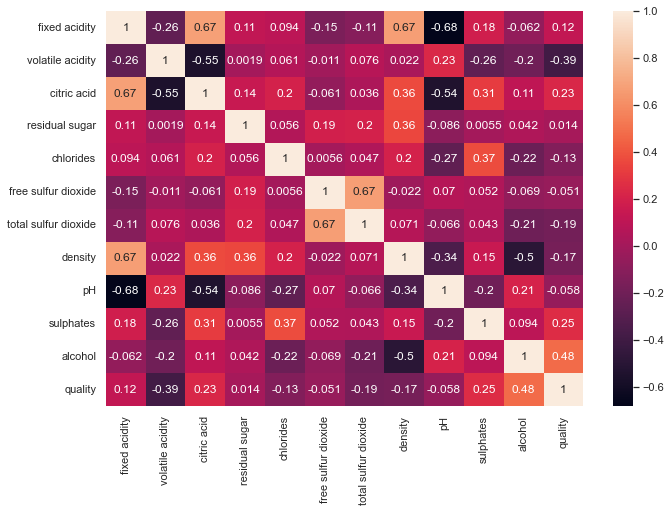

In [98]:
#Calculating Pearson correlation between all features
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.show()

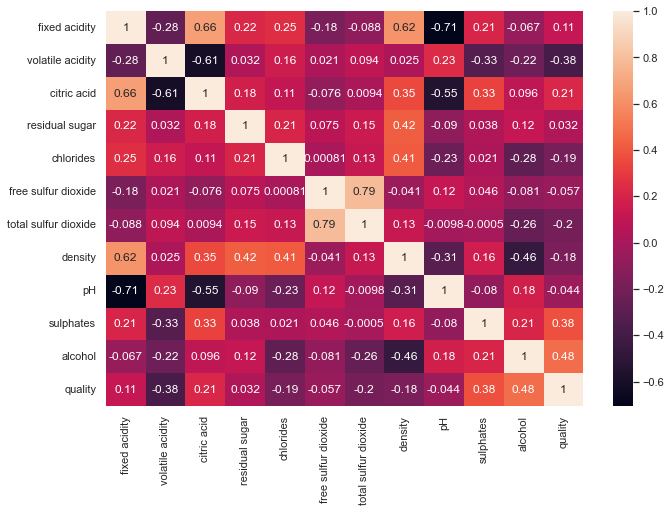

In [103]:
#Calculating Spearmans correlation between all features
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.heatmap(data.corr(method='spearman'), annot=True)
plt.show()

In [79]:
def categorize_wine(value):
    if value in (3, 4):
        return 'Bad'
    elif value in (5, 6):
        return 'Good'
    else:
        return 'Best'
    
data['quality_cat'] = data.quality.apply(categorize_wine)

In [80]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Good
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Good
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Good
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Good
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Good


# Hypothesis testing

In [81]:
def check_normality(data):
    samples = np.random.choice(data, size=(1000, 1000))
    means = [np.mean(sample) for sample in samples]
    
    _, p = stats.shapiro(means)
    
    if p < 0.05:
        print('Data is not normally distributed')
    else:
        print('Data is normally distributed')

In [82]:
def check_variance_equality(*groups):
    _, p = stats.levene(*groups)
    
    if p < 0.05:
        print('Groups have different variances')
    else:
        print('Groups have the same variances')

In [83]:
def calculate_ci(feature1, feature2, alpha=0.1) -> tuple:
    mean_diff = np.mean(feature1) - np.mean(feature2)
    n1, n2 = len(feature1), len(feature2)
    var1, var2 = np.var(feature1), np.var(feature2)
    
    critical_val = stats.t.ppf(q=1-alpha/2, df=n1+n2-2)
    
    r = critical_val * np.sqrt(var1 / n1 + var2 / n2)
    
    return (mean_diff - r, mean_diff + r)

In [84]:
bad_wine = data[data.quality_cat == 'Bad']
good_wine = data[data.quality_cat == 'Good']
best_wine = data[data.quality_cat == 'Best']

## Hyptothesis 1
### Abstract: does wine pH actually depend on its quality
### H0: Good wine average pH = bad wine average mean pH = best wine average mean pH
### H1: At least one of them is different

In [85]:
#Assumptions
check_normality(bad_wine.pH)
check_normality(good_wine.pH)
check_normality(best_wine.pH)
check_variance_equality(bad_wine.pH, good_wine.pH, best_wine.pH)

Data is normally distributed
Data is normally distributed
Data is normally distributed
Groups have the same variances


In [47]:
_, p = stats.kruskal(bad_wine.pH, good_wine.pH, best_wine.pH)
print(p)

3.4911675999579784e-05


#### *p-value is less than 0.05, therefore, reject H0*

In [48]:
print(f"Confidence interval for pH of \'bad\' and \'good\'wines: {calculate_ci(bad_wine.pH, good_wine.pH)}")
print(f"Confidence interval for pH \'bad\' and \'best\' wines: {calculate_ci(bad_wine.pH, best_wine.pH)}")
print(f"Confidence interval for pH \'best\' and \'good\' wines: {calculate_ci(best_wine.pH, good_wine.pH)}")

Confidence interval for pH of 'bad' and 'good'wines: (0.03615387707695449, 0.10950721778808181)
Confidence interval for pH 'bad' and 'best' wines: (0.05529237966338125, 0.13535790195464165)
Confidence interval for pH 'best' and 'good' wines: (-0.041045650109196995, -0.003943536643789582)


In [49]:
posthoc_df = sp.posthoc_mannwhitney([bad_wine.pH, good_wine.pH, best_wine.pH], p_adjust = 'bonferroni')
group_names= ["Bad", "Good","Best"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x < 0.05 else "background-color: white")

,Bad,Good,Best
Bad,1.000000,0.000716,0.000024
Good,0.000716,1.000000,0.054637
Best,0.000024,0.054637,1.000000


### Conclusion: bad wine pH is different from the others

## Hypothesis 2
### Abstract: find out whether the bad wine has more sulphates rather than a good one
### H0: Good wine has less sulfates rather than a bad one (μ₁≤μ₂)
### H1: μ₁>μ₂

In [50]:
#Assumptions
check_normality(bad_wine['sulphates'])
check_normality(good_wine['sulphates'])
check_variance_equality(good_wine['sulphates'], bad_wine['sulphates'])

Data is normally distributed
Data is normally distributed
Groups have the same variances


In [51]:
_, p = stats.ttest_ind(bad_wine['sulphates'], good_wine['sulphates'], alternative='greater')
print(p)

0.9938393720450195


#### *p-value is greater than 0.05 , therefore, cannot reject H0*

In [52]:
print(f"Confidence interval for sulphates of \'bad\' and \'good\' wines: {calculate_ci(bad_wine['sulphates'], good_wine['sulphates'])}")

Confidence interval for sulphates of 'bad' and 'good' wines: (-0.10180684571346679, -0.00827486602101244)


### Conclusion: *cant* reject the fact, that bad wine has more sulphates rather then a good one

## Hyptothesis 3
### Abstract: according to correlation heatmap it seems like the better wine is, the more alcohol it has, let's find out
### H0: Best wine has more alcohol rather than a bad one (μ₁>μ₂)
### H1: μ₁≤μ₂

In [53]:
#Assumptions
check_normality(good_wine.alcohol)
check_normality(best_wine.alcohol)
check_variance_equality(best_wine.alcohol, bad_wine.alcohol)

Data is normally distributed
Data is normally distributed
Groups have the same variances


In [54]:
_, p = stats.ttest_ind(best_wine.alcohol, bad_wine.alcohol, alternative='greater')
print(p)

2.5571812819102638e-18


#### *p-value is less than 0.05, therefore, reject H0*

In [55]:
print(f"Confidence interval for alcohol of \'good\' and \'best\' wines: {calculate_ci(good_wine.alcohol, best_wine.alcohol)}")

Confidence interval for alcohol of 'good' and 'best' wines: (-1.38499810305439, -1.1456667980891269)


### Conclusion: can't say that alcohol in wine actually depends on its quality

## Hypothesis 4
### Abstract: feels like the best wines are denser rather than just a good ones, let's check
### H0: Best wine is denser rather than a good one (μ₁>μ₂)
### H1: μ₁≤μ₂

In [56]:
#Assumptions
check_normality(best_wine.density)
check_normality(good_wine.density)
check_variance_equality(best_wine.density, bad_wine.density)

Data is normally distributed
Data is not normally distributed
Groups have different variances


In [57]:
_, p = stats.mannwhitneyu(best_wine.density, good_wine.density, alternative='greater')
print(p)

0.9999999994055789


#### *p-value is greater than 0.05 , therefore, cannot reject H0*

In [58]:
print(f"Confidence interval for density of \'bad\' and \'best\' wines: {calculate_ci(bad_wine.density, best_wine.density)}")

Confidence interval for density of 'bad' and 'best' wines: (0.0002356929026572685, 0.0010812144194111929)


### Conclusion: can't reject the fact, that best wine is denser

## Hypothesis 5
### Abstract: does wine's quantity of chlorides actually depend on its quality?
### H0: all types of wines have the same average chlorides quantity
### H1: at least one of them is different

In [59]:
#Assumptions
check_normality(bad_wine.chlorides)
check_normality(good_wine.chlorides)
check_normality(best_wine.chlorides)
check_variance_equality(best_wine.chlorides, good_wine.chlorides, bad_wine.chlorides)

Data is not normally distributed
Data is not normally distributed
Data is normally distributed
Groups have the same variances


In [60]:
_, p = stats.kruskal(best_wine.chlorides, good_wine.chlorides, bad_wine.chlorides)
print(p)

2.7472482772738263e-09


#### *p-value is less than 0.05, therefore, reject H0*

In [61]:
print(f"Confidence interval for chlorides of \'bad\' and \'good\' wines: {calculate_ci(bad_wine.chlorides, good_wine.chlorides)}")
print(f"Confidence interval for chlorides \'bad\' and \'best\' wines: {calculate_ci(bad_wine.chlorides, best_wine.chlorides)}")
print(f"Confidence interval for chlorides \'best\' and \'good\' wines: {calculate_ci(best_wine.chlorides, good_wine.chlorides)}")

Confidence interval for chlorides of 'bad' and 'good' wines: (-0.008845746804765872, 0.022360651073271336)
Confidence interval for chlorides 'bad' and 'best' wines: (0.00399897321488845, 0.035636459452802256)
Confidence interval for chlorides 'best' and 'good' wines: (-0.016896421982353433, -0.009224106416831813)


In [62]:
posthoc_df = sp.posthoc_mannwhitney([bad_wine.chlorides, good_wine.chlorides, best_wine.chlorides], 
                                    p_adjust = 'bonferroni')
group_names= ["Bad", "Good","Best"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x < 0.05 else "background-color: white")

,Bad,Good,Best
Bad,1.000000,1.000000,0.022376
Good,1.000000,1.000000,0.000000
Best,0.022376,0.000000,1.000000


### Conclusion: best wines contains different amount of chlorides rather than the wines of other quality

## Hypothesis 6
### Abstract: does wine's amount of residual sugars actually depend on its quality?
### H0: all of wine types have the same residual sugar quantity
### H1: at least one of them is different

In [63]:
#Assumptions
check_normality(bad_wine['residual sugar'])
check_normality(good_wine['residual sugar'])
check_normality(best_wine['residual sugar'])
check_variance_equality(best_wine['residual sugar'], good_wine['residual sugar'], bad_wine['residual sugar'])

Data is normally distributed
Data is not normally distributed
Data is normally distributed
Groups have the same variances


In [64]:
_, p = stats.kruskal(best_wine['residual sugar'], good_wine['residual sugar'], bad_wine['residual sugar'])
print(p)

0.054204828111863584


#### *p-value is greater than 0.05 , therefore, cannot reject H0*

In [65]:
print(f"Confidence interval for residual sugars of \'bad\' and \'good\' wines: {calculate_ci(bad_wine['residual sugar'], good_wine['residual sugar'])}")
print(f"Confidence interval for residual sugars of \'bad\' and \'best\' wines: {calculate_ci(bad_wine['residual sugar'], best_wine['residual sugar'])}")
print(f"Confidence interval for residual sugars of \'best\' and \'good\' wines: {calculate_ci(best_wine['residual sugar'], good_wine['residual sugar'])}")

Confidence interval for residual sugars of 'bad' and 'good' wines: (-0.17917524350143227, 0.5412833821827325)
Confidence interval for residual sugars of 'bad' and 'best' wines: (-0.4106529748539649, 0.36298272395790887)
Confidence interval for residual sugars of 'best' and 'good' wines: (0.04025434510172832, 0.36952404447562803)


In [66]:
posthoc_df = sp.posthoc_mannwhitney([bad_wine['residual sugar'], good_wine['residual sugar'], 
                                     best_wine['residual sugar']], 
                                    p_adjust = 'bonferroni')
group_names= ["Bad", "Good","Best"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x < 0.05 else "background-color: white")

,Bad,Good,Best
Bad,1.000000,1.000000,0.556922
Good,1.000000,1.000000,0.049836
Best,0.556922,0.049836,1.000000


### Conclusion: it looks like the best quality wine amount of residual sugars is different from good quality wine, but p-value is super close to 0.05, so it's legitimate to say, that we can't reject the theory about equality of residual sugar amount for all wines